In [1]:
import pandas as pd
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import datetime as dt
%matplotlib inline

In [2]:
test= pd.read_csv('E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_15_april_10000_1.csv')

In [3]:
# test.info()
# test.head()
# test.columns

In [4]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

C:\Users\atif\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [5]:
test_new.head()

,row ID,longTime,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,...,RWWIHOT8_RV0,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0,stringTime,correct_longtime
0,Row0,1555311120000,74.451979,19.111606,98.371549,18.819155,93.337524,69.969526,95.445534,7.802471,...,44.620461,22.338103,75.685755,73.945394,0.000000,0.000000,0.000000,0.000000,2019-04-15 08:52,1555311120
1,Row1,1555311060000,73.933103,18.088026,98.186038,18.943335,92.869960,69.969526,95.445534,12.856953,...,53.182296,26.967692,75.685755,66.649583,56.385432,68.734584,9.127668,2.275890,2019-04-15 08:51,1555311060
2,Row2,1555311000000,73.471742,25.843589,98.371549,33.166077,92.343799,69.969526,95.628479,21.591973,...,53.029243,26.851837,75.685755,66.587330,56.402658,68.853203,9.136596,2.275735,2019-04-15 08:50,1555311000
3,Row3,1555310940000,73.010381,27.772137,98.371549,35.991205,91.876236,69.850105,95.607810,19.492370,...,53.015226,26.266369,75.685755,66.373907,56.527297,69.391059,9.138625,2.281882,2019-04-15 08:49,1555310940
4,Row4,1555310880000,72.549020,18.402556,98.186038,19.591687,91.408672,69.969526,95.607810,8.014898,...,53.172932,26.605640,75.685755,66.529224,56.640964,69.299560,9.121256,2.269317,2019-04-15 08:48,1555310880


In [6]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [7]:
# print(test_new.head())
# e=test_new.loc[0:10,['AEWIHOAVAB2','RWWIHOAK__V0','AEWIHO_T9AV2','RWWIHOB_MWT0','DEWIHOAT8_I0','DEWIHOBT8_I0',
#                      'DEWIHOAT9_I0','DEWIHOBT9_I0','RWWIHOB_HWT0','AEWIHOBKZ_V0','RWWIHOB_MWT0']]
# print(e)

# following code for Linear Regression

In [8]:
train_data=test_new.loc[500:8000,['correct_longtime','AEDATZ_HO_V0','RWWIHOA_HWT0', 'RWWIHOB_HWT0',
                                  'AEWIHOAKZ_V0', 'AEWIHOBKZ_V0','RWWIHOA_MWT0','RWWIHOB_MWT0',
                                  'AEWIHO_T9AV2','AEDAHO_T9_V2']]
print(train_data.head())
train_data_array=train_data.as_matrix()
# print(train_data_array)
train_input=train_data_array[:,:9]
train_output=train_data_array[:,9]
# print(train_output)

     correct_longtime  AEDATZ_HO_V0  RWWIHOA_HWT0  RWWIHOB_HWT0  AEWIHOAKZ_V0  \
500        1554975180     36.275050     91.094201           0.0           0.0   
501        1554975120     34.384378     91.007505           0.0           0.0   
502        1554975060     32.296527     91.087722           0.0           0.0   
503        1554975000     30.584083     91.070699           0.0           0.0   
504        1554974940     29.099978     91.314595           0.0           0.0   

     AEWIHOBKZ_V0  RWWIHOA_MWT0  RWWIHOB_MWT0  AEWIHO_T9AV2  AEDAHO_T9_V2  
500           0.0     94.536148           0.0     64.671260     42.305187  
501           0.0     94.486522           0.0     64.795520     42.480315  
502           0.0     94.449906           0.0     64.542595     42.343193  
503           0.0     94.516623           0.0     64.560526     42.108748  
504           0.0     94.536962           0.0     64.576255     42.292350  


C:\Users\atif\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [9]:
train_data.head()

,correct_longtime,AEDATZ_HO_V0,RWWIHOA_HWT0,RWWIHOB_HWT0,AEWIHOAKZ_V0,AEWIHOBKZ_V0,RWWIHOA_MWT0,RWWIHOB_MWT0,AEWIHO_T9AV2,AEDAHO_T9_V2
500,1554975180,36.275050,91.094201,0.0,0.0,0.0,94.536148,0.0,64.671260,42.305187
501,1554975120,34.384378,91.007505,0.0,0.0,0.0,94.486522,0.0,64.795520,42.480315
502,1554975060,32.296527,91.087722,0.0,0.0,0.0,94.449906,0.0,64.542595,42.343193
503,1554975000,30.584083,91.070699,0.0,0.0,0.0,94.516623,0.0,64.560526,42.108748
504,1554974940,29.099978,91.314595,0.0,0.0,0.0,94.536962,0.0,64.576255,42.292350


In [10]:
# AEDATZ_HO_V0=test_new.loc[0:,['AEDATZ_HO_V0']]
# AEDATZ_HO_V0=AEDATZ_HO_V0.as_matrix()

# all_date=test_new.loc[0:,['dateTime']]
# all_date=all_date.as_matrix()
# # print(all_date[0])

# RWWIHOA_HWT0=test_new.loc[0:,['RWWIHOA_HWT0']]
# RWWIHOA_HWT0=RWWIHOA_HWT0.as_matrix()

In [11]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [12]:
train_model=LinearRegression(fit_intercept=False,normalize=True).fit(train_input,train_output)
print(train_model)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=True)


In [13]:
test_data=test_new.loc[9000:9900,['correct_longtime','AEDATZ_HO_V0','RWWIHOA_HWT0', 'RWWIHOB_HWT0',
                                  'AEWIHOAKZ_V0', 'AEWIHOBKZ_V0','RWWIHOA_MWT0','RWWIHOB_MWT0',
                                  'AEWIHO_T9AV2','AEDAHO_T9_V2']]
test_data_array=test_data.as_matrix()
test_input=test_data_array[:,:9]
predicted_op=train_model.predict(test_input)
print(predicted_op[100])

actual_op=test_data_array[:,9]
print(actual_op[100])

66.05522497816332
68.28837339422725


C:\Users\atif\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [14]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('Slope:' ,train_model.coef_)
print('Intercept:', train_model.intercept_)
print('r_2 statistic: %.2f' % r2_score(actual_op,predicted_op))
print("Mean_absolute_error: %.2f" % mean_absolute_error(actual_op,predicted_op))
print("Mean squared error: %.2f" % mean_squared_error(actual_op,predicted_op))
RMSE=math.sqrt(mean_squared_error(actual_op,predicted_op))
print('RMSE: ',RMSE)

Slope: [-8.34768649e-09  6.19795902e-01  7.52068880e-01 -6.40325313e-01
 -3.42059112e-02  1.24984758e-01 -7.12730139e-01  7.47022963e-01
  5.68913962e-01]
Intercept: 0.0
r_2 statistic: 0.20
Mean_absolute_error: 2.15
Mean squared error: 8.02
RMSE:  2.8320066904966503


In [15]:
print(train_model.score(test_input,actual_op))

0.20175359709423923


In [16]:
dateTime=test_new.loc[9000:9900,['dateTime']]
dateTime=dateTime.as_matrix()

for s in dateTime:
    print(type(s[0]))

<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<class 'numpy.datetime64'>
<

C:\Users\atif\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [17]:
start_index=700
end_index=900
interval=20

predicted_op_rev=predicted_op[start_index:end_index]
predicted_op_rev=predicted_op_rev[::-1]
# # print(predicted_op_rev)
actual_op_rev=actual_op[start_index:end_index]
actual_op_rev=actual_op_rev[::-1]

dateTime_predict=dateTime[start_index:end_index]
dateTime_predict_rev=dateTime_predict[::-1]
# print(dateTime[8000:8020])
dateTime_actual=dateTime[start_index:end_index]
dateTime_actual_rev=dateTime_actual[::-1]

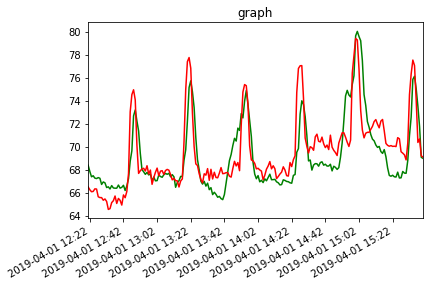

In [19]:
plt.title('graph')
plt.subplots_adjust(bottom=.2)
plt.xticks( rotation=25)
ax=plt.gca()

minlocator = md.MinuteLocator(interval=interval) # to plot every minute of an range
# minlocator.MAXTICKS  = 40000
ax.xaxis.set_major_locator(minlocator)

xfmt = md.DateFormatter('%Y-%m-%d %H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(dateTime_predict_rev,predicted_op_rev,color='green') #you can give here datenums_array
plt.plot(dateTime_actual_rev,actual_op_rev,color='RED')
plt.gcf().autofmt_xdate() # to beautify the X label

plt.xlim(dateTime_predict_rev[0],dateTime_predict_rev[-1])
plt.show()

In [ ]:
print('predicted_op: ',predicted_op[start_index:end_index])
print('\npredicted_op_rev',predicted_op_rev)
print('\nactual_op',actual_op[start_index:end_index])
print('\nactual_op_rev',actual_op_rev)

In [ ]:
# check_data=test_new.loc[8000:8019,['dateTime','AEDAHO_T9_V2']] #it will take 21 value. not like numpy array
# print(check_data)

In [ ]:
# print(dateTime[8020:8040])
# print('\n',dateTime_predict_rev)

# following code for SVR

In [ ]:
import seaborn as sn
from sklearn import svm
# from sklearn import preprocessing, cross_validation, neighbors, svm
from sklearn.svm import SVR

In [ ]:
# X_train, X_test, y_train, y_test = cross_validation.train_test_split(train_input, train_output, test_size=0.2)

clf= SVR(kernel='rbf', C=100, gamma='auto', degree=3, epsilon=.1,coef0=1)

clf.fit(train_input,train_output)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, train_input, train_output, cv=5)

In [ ]:
scores

In [ ]:
# print(type(train_output))

prediction_svr=clf.predict(test_input)
# print(prediction_svr[start_index:end_index])

#print('\n',actual_op[start_index:end_index])

In [ ]:
confidence = clf.score(test_input,actual_op)
print('confidence: ',confidence)
print('score: ',clf.score(test_input,actual_op))
from sklearn.metrics import r2_score
print('r2_score: ',r2_score(actual_op,prediction_svr))

In [ ]:
prediction_svr_rev=prediction_svr[start_index:end_index]
prediction_svr_rev=prediction_svr_rev[::-1]
# # print(predicted_op_rev)
actual_op_svr_rev=actual_op[start_index:end_index]
actual_op_svr_rev=actual_op_svr_rev[::-1]

# dateTime_predict=dateTime[8000:8020]
# dateTime_predict_rev=dateTime_predict[::-1]
# print(dateTime_predict_rev)
# dateTime_actual=dateTime[8005:8025]
# dateTime_actual_rev=datetime_actual[::-1]

plt.title('graph')
plt.subplots_adjust(bottom=.2)
plt.xticks( rotation=25)
ax=plt.gca()

minlocator = md.MinuteLocator(interval=interval) # to plot every minute of an range
# minlocator.MAXTICKS  = 40000
ax.xaxis.set_major_locator(minlocator)

xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(dateTime_predict_rev,prediction_svr_rev,color='green') #you can give here datenums_array
plt.plot(dateTime_actual_rev,actual_op_svr_rev,color='RED')
plt.gcf().autofmt_xdate() # to beautify the X label

# plt.xlim(dateTime_predict_rev[0],dateTime_actual_rev[-1])
plt.show()

In [ ]:
# plt.title('checking train')
# plt.plot(all_date[500:8000:100],AEDATZ_HO_V0[500:8000:100])
# plt.show()
# train_inp=np.zeros((7500,2))
print(all_date.ndim)
train_inp=np.column_stack((RWWIHOA_HWT0,AEDATZ_HO_V0))
#train_inp=[all_date[500:8000],RWWIHOA_HWT0[500:8000]]
#train_op=AEDATZ_HO_V0[500:8000]
print(train_inp)

In [ ]:
clf= SVR(kernel='rbf', C=10, gamma='auto', degree=3, epsilon=.1,coef0=1)

clf.fit(train_inp,train_op)

In [ ]:
test_ip=all_date[8020:9000]
predict_op=clf.predict(test_ip)

In [ ]:
# print(predict_op)
# print('\n',AEDATZ_HO_V0[8020:9000])
actual_op=AEDATZ_HO_V0[8020:9000]

In [ ]:
plt.plot(test_ip,predict_op)
plt.plot(test_ip,actual_op)

In [ ]:
regressor=SVR(kernel='poly',epsilon=1,degree=3)
regressor.fit(train_input,train_output)
pred=regressor.predict(test_input)
print(regressor.score(test_input,actual_op))
print(r2_score(actual_op,pred))

In [ ]:
p=pred[start_index:end_index]
p=p[::-1]
# # print(predicted_op_rev)
actual_op_svr_rev=actual_op[start_index:end_index]
actual_op_svr_rev=actual_op_svr_rev[::-1]

# dateTime_predict=dateTime[8000:8020]
# dateTime_predict_rev=dateTime_predict[::-1]
# print(dateTime_predict_rev)
# dateTime_actual=dateTime[8005:8025]
# dateTime_actual_rev=datetime_actual[::-1]

plt.title('graph')
plt.subplots_adjust(bottom=.2)
plt.xticks( rotation=25)
ax=plt.gca()

minlocator = md.MinuteLocator(interval=interval) # to plot every minute of an range
# minlocator.MAXTICKS  = 40000
ax.xaxis.set_major_locator(minlocator)

xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(dateTime_predict_rev,p,color='green') #you can give here datenums_array
plt.plot(dateTime_actual_rev,actual_op_svr_rev,color='RED')
plt.gcf().autofmt_xdate() # to beautify the X label

# plt.xlim(dateTime_predict_rev[0],dateTime_actual_rev[-1])
plt.show()

In [ ]:
# pd.isnull(test_new).sum() # to display how many NaN values are in each column.

In [ ]:
initial=9000
final=9900
step=1000

def plot_tricks(y_item,y_label):
    
    my_time=test_new.loc[initial:final:step,['dateTime']]
    my_time_rev=my_time[::-1]
    
    my_value=test_new.loc[initial:final:step,[y_item]]
    my_value=my_value.as_matrix()
    my_value=my_value[::,0]
    my_value_rev=my_value[::-1]
    
    plt.title('test graph')
    plt.subplots_adjust(bottom=.2)
    plt.xticks( rotation=25)
    ax=plt.gca()

    minlocator = md.MinuteLocator(interval=step) # to plot every minute of an range
# minlocator.MAXTICKS  = 40000
    ax.xaxis.set_major_locator(minlocator)

    xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
    ax.xaxis.set_major_formatter(xfmt)
    plt.plot(my_time_rev,my_value_rev,color='green') #you can give here datenums_array
    plt.ylabel(y_label)
    plt.xlabel('Time')
#     plt.plot(dateTime_actual_rev,actual_op_svr_rev,color='RED')
    plt.xlim(my_time_rev[0],my_time_rev[-1])
    plt.gcf().autofmt_xdate() # to beautify the X label
    plt.show()
    
plot_tricks(y_item='AEDATZ_HO_V0',y_label='AEDAHO_T8_V2')